imports

In [78]:
import sys
print(sys.executable)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import seaborn as sns
import missingno as msno

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


c:\Users\micha\anaconda3\python.exe



loading the dataset

In [79]:
file_path = 'heart.csv'
data = pd.read_csv(file_path)

understanding  the dataset

In [80]:
data_info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             924 non-null    int64  
 1   Sex             924 non-null    object 
 2   ChestPainType   923 non-null    object 
 3   RestingBP       918 non-null    float64
 4   Cholesterol     924 non-null    int64  
 5   FastingBS       924 non-null    int64  
 6   RestingECG      923 non-null    object 
 7   MaxHR           924 non-null    int64  
 8   ExerciseAngina  924 non-null    object 
 9   Oldpeak         924 non-null    float64
 10  ST_Slope        923 non-null    object 
 11  HeartDisease    923 non-null    float64
 12  id              924 non-null    int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 94.0+ KB


In [81]:
data_shape=data.shape
data_shape

(924, 13)

In [82]:
data_head = data.head() 
data_head


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,id
0,40,M,ATA,140.0,289,0,Normal,172,N,0.0,Up,0.0,1
1,49,F,NAP,160.0,180,0,Normal,156,N,1.0,Flat,1.0,2
2,37,M,ATA,130.0,283,0,ST,98,N,0.0,Up,0.0,3
3,48,F,ASY,138.0,214,0,Normal,108,Y,1.5,Flat,1.0,4
4,54,M,NAP,150.0,195,0,Normal,122,N,0.0,Up,0.0,5


In [83]:
data_describe = data.describe()
data_describe

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,id
count,924.000000,918.000000,924.000000,924.000000,924.000000,924.000000,923.000000,924.000000
mean,53.444805,132.382353,199.370130,0.231602,136.834416,0.884848,0.550379,456.715368
std,9.459739,18.509592,109.625262,0.422084,25.385941,1.065080,0.497725,266.527784
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,1.000000
25%,47.000000,120.000000,174.750000,0.000000,120.000000,0.000000,0.000000,225.750000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.550000,1.000000,456.500000
75%,60.000000,140.000000,267.000000,0.000000,155.250000,1.500000,1.000000,687.250000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000,918.000000


Filtering dataset

In [84]:
data=data.drop(['id'],axis=1)
data_info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             924 non-null    int64  
 1   Sex             924 non-null    object 
 2   ChestPainType   923 non-null    object 
 3   RestingBP       918 non-null    float64
 4   Cholesterol     924 non-null    int64  
 5   FastingBS       924 non-null    int64  
 6   RestingECG      923 non-null    object 
 7   MaxHR           924 non-null    int64  
 8   ExerciseAngina  924 non-null    object 
 9   Oldpeak         924 non-null    float64
 10  ST_Slope        923 non-null    object 
 11  HeartDisease    923 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 86.8+ KB


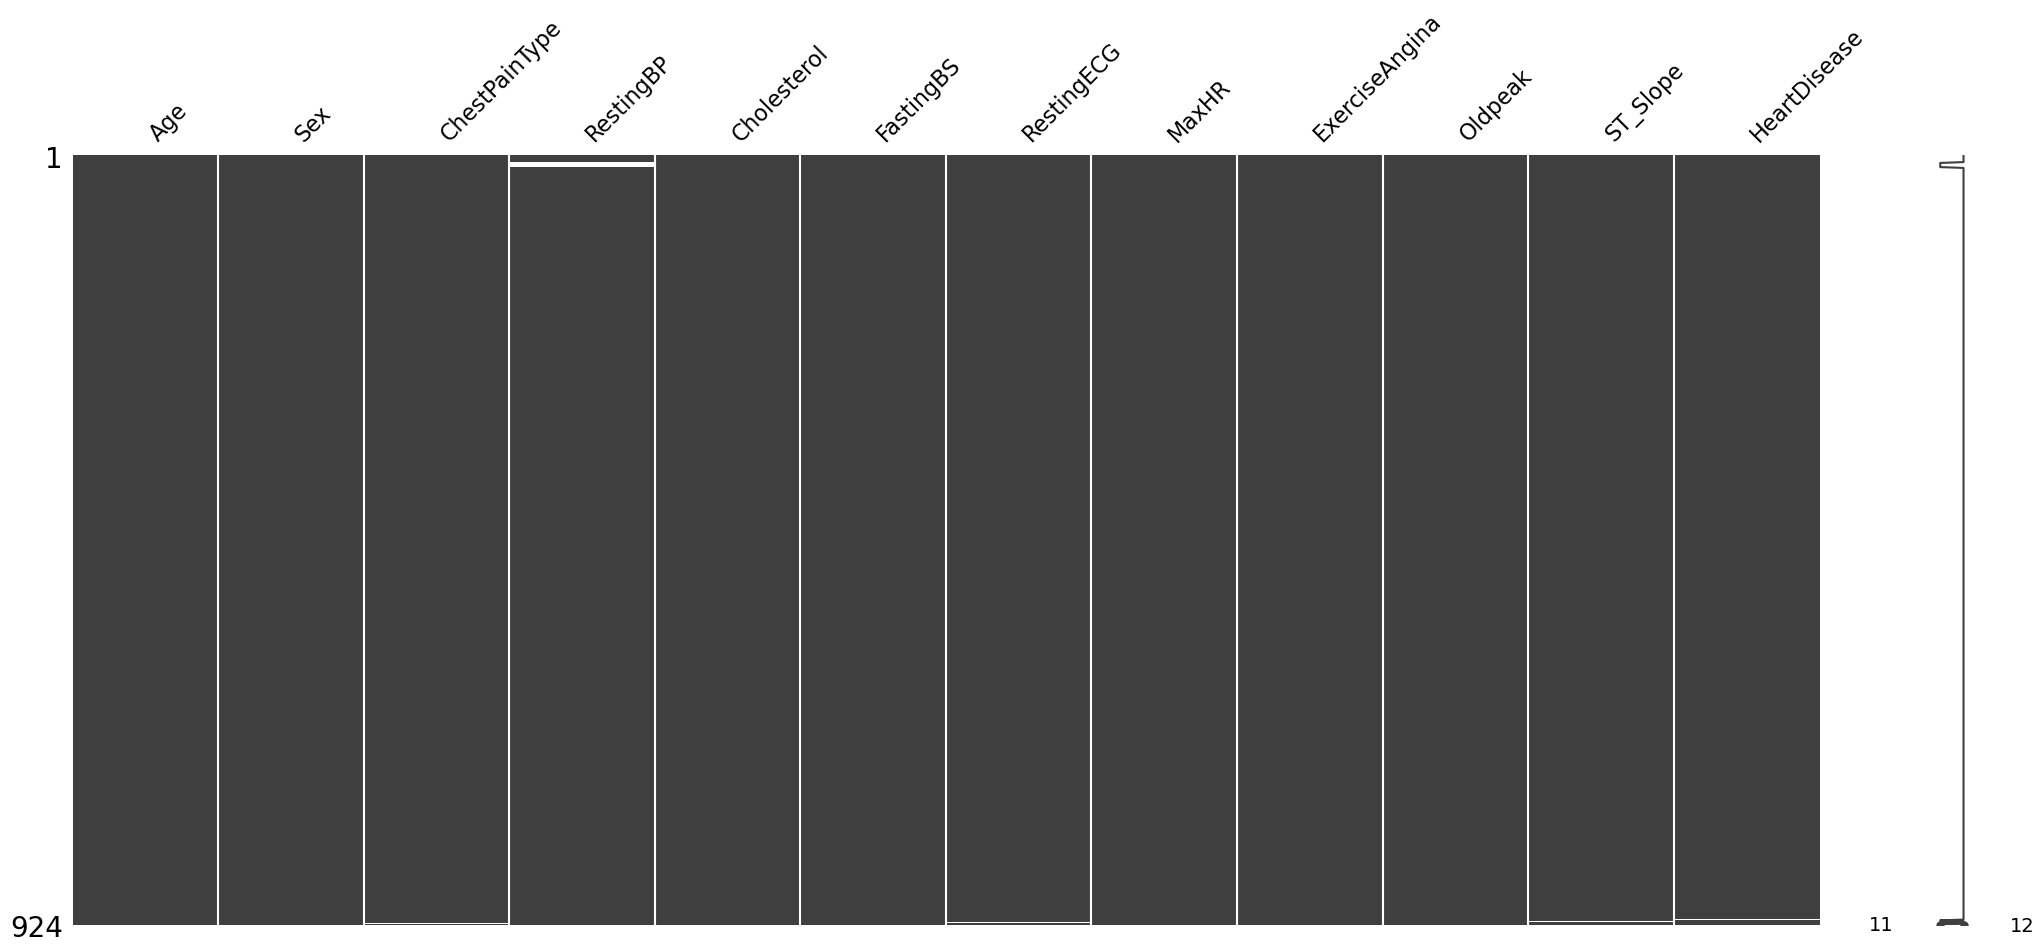

In [85]:
data.isnull()
data.isnull().sum()
msno.matrix(data)
plt.show()


handling missing values

In [86]:
data['RestingBP']= data['RestingBP'].fillna(data['RestingBP'].mean())
data.isnull().sum()

Age               0
Sex               0
ChestPainType     1
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        1
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          1
HeartDisease      1
dtype: int64

In [87]:
data=data.dropna()
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

handling duplicates

In [88]:
data.duplicated().sum()


6

In [89]:
data=data.drop_duplicates()
data.duplicated().sum()


0

changing text to integers

In [90]:
data['Sex'].unique()

array(['M', 'F'], dtype=object)

In [91]:
data['Sex']=data['Sex'].replace(['M','F'],[1,2])

C:\Users\micha\AppData\Local\Temp\ipykernel_8640\1349877312.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Sex']=data['Sex'].replace(['M','F'],[1,2])


In [92]:
data['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [93]:
data['ChestPainType']=data['ChestPainType'].replace(['ATA', 'NAP', 'ASY', 'TA'],[1,2,3,4])

C:\Users\micha\AppData\Local\Temp\ipykernel_8640\1990012646.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['ChestPainType']=data['ChestPainType'].replace(['ATA', 'NAP', 'ASY', 'TA'],[1,2,3,4])


In [94]:
data['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [95]:
data['ExerciseAngina']=data['ExerciseAngina'].replace(['N', 'Y'],[1,2])

C:\Users\micha\AppData\Local\Temp\ipykernel_8640\777557791.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['ExerciseAngina']=data['ExerciseAngina'].replace(['N', 'Y'],[1,2])


In [96]:
data['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [97]:
data['RestingECG']=data['RestingECG'].replace(['Normal', 'ST', 'LVH'],[1,2,3])

C:\Users\micha\AppData\Local\Temp\ipykernel_8640\3122473019.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['RestingECG']=data['RestingECG'].replace(['Normal', 'ST', 'LVH'],[1,2,3])


In [98]:
data['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [99]:
data['ST_Slope']=data['ST_Slope'].replace(['Up', 'Flat', 'Down'],[1,2,3])

C:\Users\micha\AppData\Local\Temp\ipykernel_8640\2737855698.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['ST_Slope']=data['ST_Slope'].replace(['Up', 'Flat', 'Down'],[1,2,3])


Data visualization and relationship

In [100]:
data['Age'].value_counts(normalize=True)

Age
54    0.055799
58    0.045952
55    0.044858
56    0.041575
52    0.039387
57    0.039387
51    0.038293
62    0.038293
59    0.037199
53    0.036105
60    0.035011
48    0.033917
61    0.033917
63    0.032823
50    0.027352
46    0.026258
41    0.026258
43    0.026258
64    0.024070
65    0.022976
49    0.022976
47    0.020788
44    0.020788
42    0.019694
45    0.018600
38    0.017505
67    0.016411
39    0.016411
66    0.014223
69    0.014223
40    0.014223
35    0.012035
37    0.012035
68    0.010941
34    0.007659
74    0.007659
70    0.007659
36    0.006565
71    0.005470
32    0.005470
72    0.004376
29    0.003282
75    0.003282
33    0.002188
77    0.002188
76    0.002188
31    0.002188
30    0.001094
28    0.001094
73    0.001094
Name: proportion, dtype: float64

<Axes: xlabel='Age'>

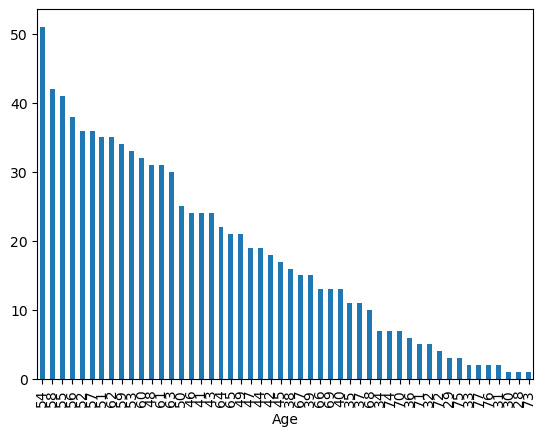

In [101]:
data['Age'].value_counts().plot(kind='bar')

<Axes: xlabel='Sex'>

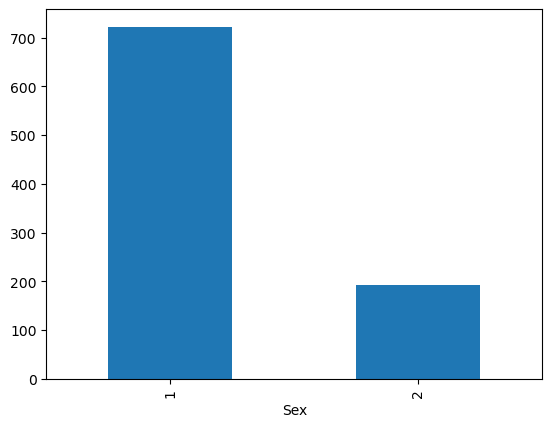

In [102]:
data['Sex'].value_counts().plot(kind='bar')

In [103]:
data.groupby('Sex')["HeartDisease"].mean()

Sex
1    0.630194
2    0.255208
Name: HeartDisease, dtype: float64

In [104]:
data.groupby('Age')["HeartDisease"].mean()

Age
28    0.000000
29    0.000000
30    0.000000
31    0.500000
32    0.400000
33    0.500000
34    0.285714
35    0.363636
36    0.333333
37    0.090909
38    0.687500
39    0.133333
40    0.461538
41    0.250000
42    0.166667
43    0.458333
44    0.315789
45    0.117647
46    0.541667
47    0.578947
48    0.483871
49    0.523810
50    0.560000
51    0.428571
52    0.527778
53    0.454545
54    0.450980
55    0.585366
56    0.657895
57    0.666667
58    0.666667
59    0.647059
60    0.750000
61    0.838710
62    0.714286
63    0.766667
64    0.681818
65    0.714286
66    0.538462
67    0.800000
68    0.600000
69    0.769231
70    0.857143
71    0.400000
72    0.750000
73    1.000000
74    0.714286
75    0.666667
76    0.500000
77    1.000000
Name: HeartDisease, dtype: float64

<Axes: xlabel='Age'>

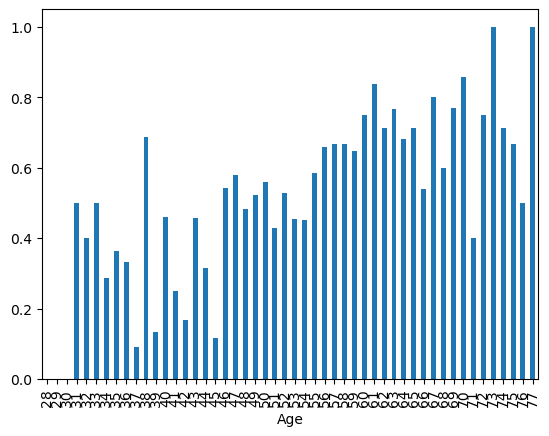

In [105]:
data.groupby('Age')["HeartDisease"].mean().plot(kind='bar')

In [106]:
data.groupby('ChestPainType')["HeartDisease"].mean()

ChestPainType
1    0.133721
2    0.354680
3    0.789474
4    0.422222
Name: HeartDisease, dtype: float64

In [107]:

data.groupby('RestingBP')["HeartDisease"].mean()

RestingBP
0.0      1.0
80.0     0.0
92.0     1.0
94.0     0.0
95.0     1.0
        ... 
180.0    0.5
185.0    1.0
190.0    0.5
192.0    1.0
200.0    1.0
Name: HeartDisease, Length: 67, dtype: float64

In [108]:
data.groupby('Cholesterol')["HeartDisease"].mean()

Cholesterol
0      0.883721
85     0.000000
100    0.500000
110    1.000000
113    1.000000
         ...   
491    1.000000
518    1.000000
529    1.000000
564    0.000000
603    1.000000
Name: HeartDisease, Length: 220, dtype: float64

<Axes: xlabel='Cholesterol'>

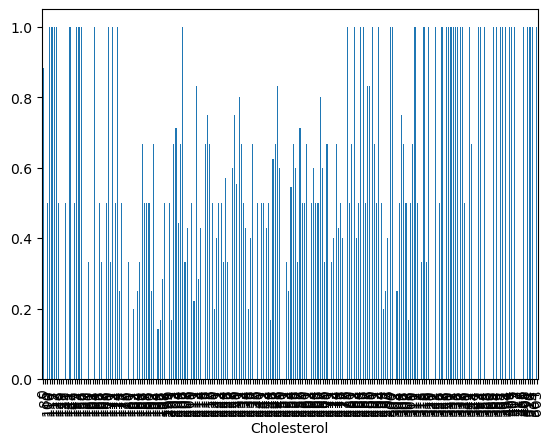

In [109]:
data.groupby('Cholesterol')["HeartDisease"].mean().plot(kind='bar')

In [110]:
data.groupby('FastingBS')["HeartDisease"].mean()

FastingBS
0    0.477889
1    0.793427
Name: HeartDisease, dtype: float64

In [111]:
data.groupby('RestingECG')["HeartDisease"].mean()


RestingECG
1    0.514545
2    0.657303
3    0.559140
Name: HeartDisease, dtype: float64

In [112]:
data.groupby('MaxHR')["HeartDisease"].mean()

MaxHR
60     1.0
63     1.0
67     1.0
69     0.0
70     1.0
      ... 
190    0.0
192    0.0
194    0.0
195    1.0
202    0.0
Name: HeartDisease, Length: 119, dtype: float64

<Axes: xlabel='MaxHR'>

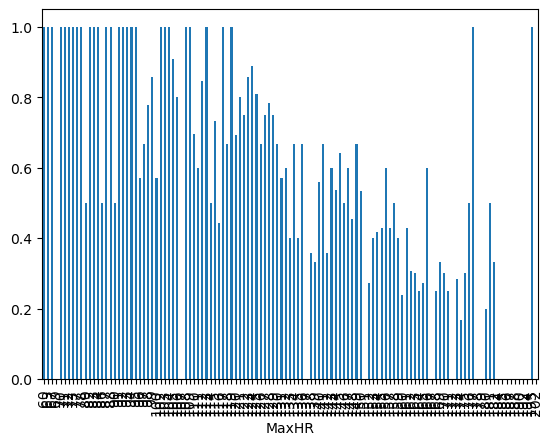

In [113]:

data.groupby('MaxHR')["HeartDisease"].mean().plot(kind='bar')

In [114]:

data.groupby('ExerciseAngina')["HeartDisease"].mean()

ExerciseAngina
1    0.347426
2    0.851351
Name: HeartDisease, dtype: float64

In [115]:

data.groupby('Oldpeak')["HeartDisease"].mean()

Oldpeak
-2.6    1.000000
-2.0    1.000000
-1.5    1.000000
-1.1    0.000000
-1.0    1.000000
-0.9    1.000000
-0.8    1.000000
-0.7    1.000000
-0.5    0.500000
-0.1    0.000000
 0.0    0.335150
 0.1    0.357143
 0.2    0.181818
 0.3    0.272727
 0.4    0.181818
 0.5    0.631579
 0.6    0.285714
 0.7    0.714286
 0.8    0.500000
 0.9    0.750000
 1.0    0.694118
 1.1    0.714286
 1.2    0.708333
 1.3    0.714286
 1.4    0.666667
 1.5    0.792453
 1.6    0.500000
 1.7    1.000000
 1.8    0.823529
 1.9    0.714286
 2.0    0.815789
 2.1    1.000000
 2.2    1.000000
 2.3    0.000000
 2.4    0.750000
 2.5    1.000000
 2.6    0.857143
 2.8    1.000000
 2.9    1.000000
 3.0    0.892857
 3.1    1.000000
 3.2    1.000000
 3.4    1.000000
 3.5    0.500000
 3.6    1.000000
 3.7    1.000000
 3.8    1.000000
 4.0    1.000000
 4.2    0.500000
 4.4    1.000000
 5.0    1.000000
 5.6    1.000000
 6.2    1.000000
Name: HeartDisease, dtype: float64

<Axes: xlabel='Oldpeak'>

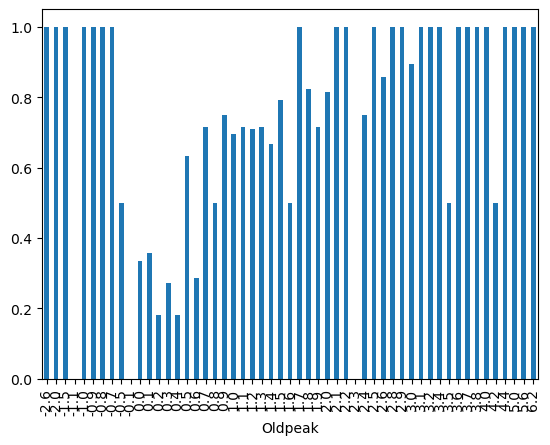

In [116]:
data.groupby('Oldpeak')["HeartDisease"].mean().plot(kind='bar')

In [117]:

data.groupby('ST_Slope')["HeartDisease"].mean()


ST_Slope
1    0.197468
2    0.826754
3    0.777778
Name: HeartDisease, dtype: float64

<Axes: xlabel='Cholesterol', ylabel='RestingBP'>

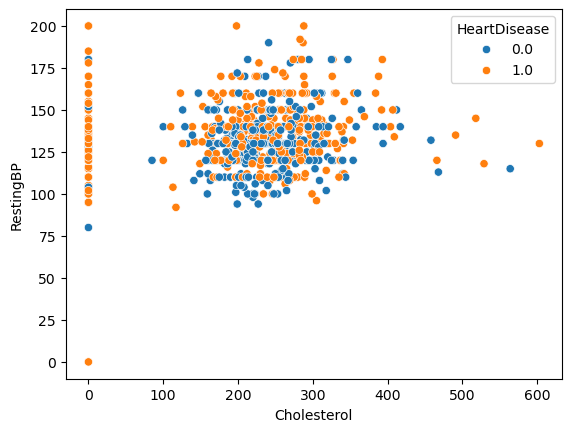

In [118]:
sns.scatterplot(data=data , y="RestingBP" ,x="Cholesterol",hue="HeartDisease")

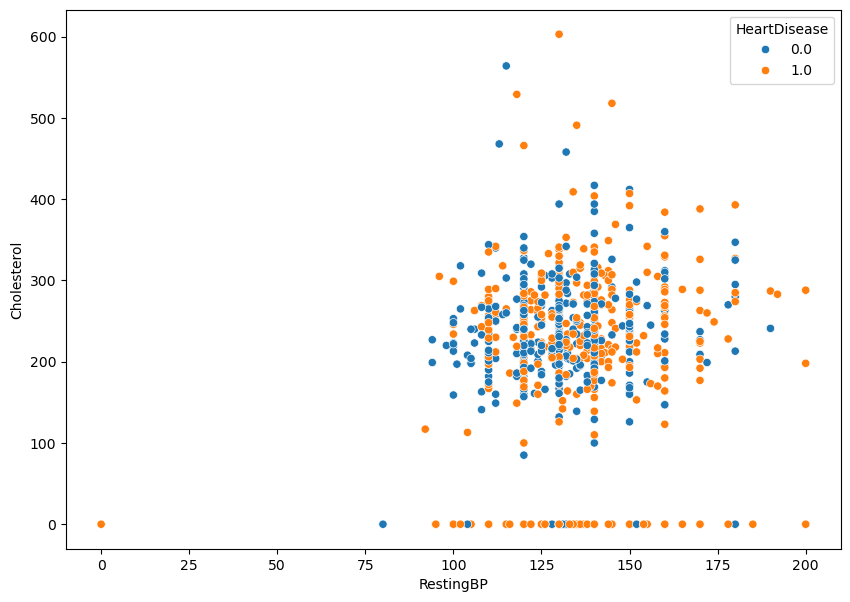

In [119]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=data,x="RestingBP", y="Cholesterol",hue="HeartDisease")
plt.show()

exploratory data analysis

In [120]:
data_catagorical=data.select_dtypes(include=['category'])
data_catagorical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 914 entries, 0 to 923
Empty DataFrame


In [121]:
data.nunique().sort_values()

Sex                 2
FastingBS           2
ExerciseAngina      2
HeartDisease        2
RestingECG          3
ST_Slope            3
ChestPainType       4
Age                50
Oldpeak            53
RestingBP          67
MaxHR             119
Cholesterol       220
dtype: int64

In [122]:
data_catagorical=data.nunique().reset_index()
data_catagorical

,index,0
0,Age,50
1,Sex,2
2,ChestPainType,4
3,RestingBP,67
4,Cholesterol,220
5,FastingBS,2
6,RestingECG,3
7,MaxHR,119
8,ExerciseAngina,2
9,Oldpeak,53


In [123]:
data_catagorical.columns=['features','categories']
data_catagorical

,features,categories
0,Age,50
1,Sex,2
2,ChestPainType,4
3,RestingBP,67
4,Cholesterol,220
5,FastingBS,2
6,RestingECG,3
7,MaxHR,119
8,ExerciseAngina,2
9,Oldpeak,53


In [124]:
data_catagorical=data_catagorical.sort_values(by="categories")
data_catagorical=data_catagorical[data_catagorical.categories<5]
data_catagorical.features.values

array(['Sex', 'FastingBS', 'ExerciseAngina', 'HeartDisease', 'RestingECG',
       'ST_Slope', 'ChestPainType'], dtype=object)

In [125]:
data_catagorical=data[data_catagorical.features.values]
data_catagorical

,Sex,FastingBS,ExerciseAngina,HeartDisease,RestingECG,ST_Slope,ChestPainType
0,1,0,1,0.0,1,1,1
1,2,0,1,1.0,1,2,2
2,1,0,1,0.0,2,1,1
3,2,0,2,1.0,1,2,3
4,1,0,1,0.0,1,1,2
...,...,...,...,...,...,...,...
915,2,0,2,1.0,1,2,3
916,1,0,1,0.0,1,1,1
918,2,0,2,1.0,1,2,3
920,1,1,1,1.0,1,2,3


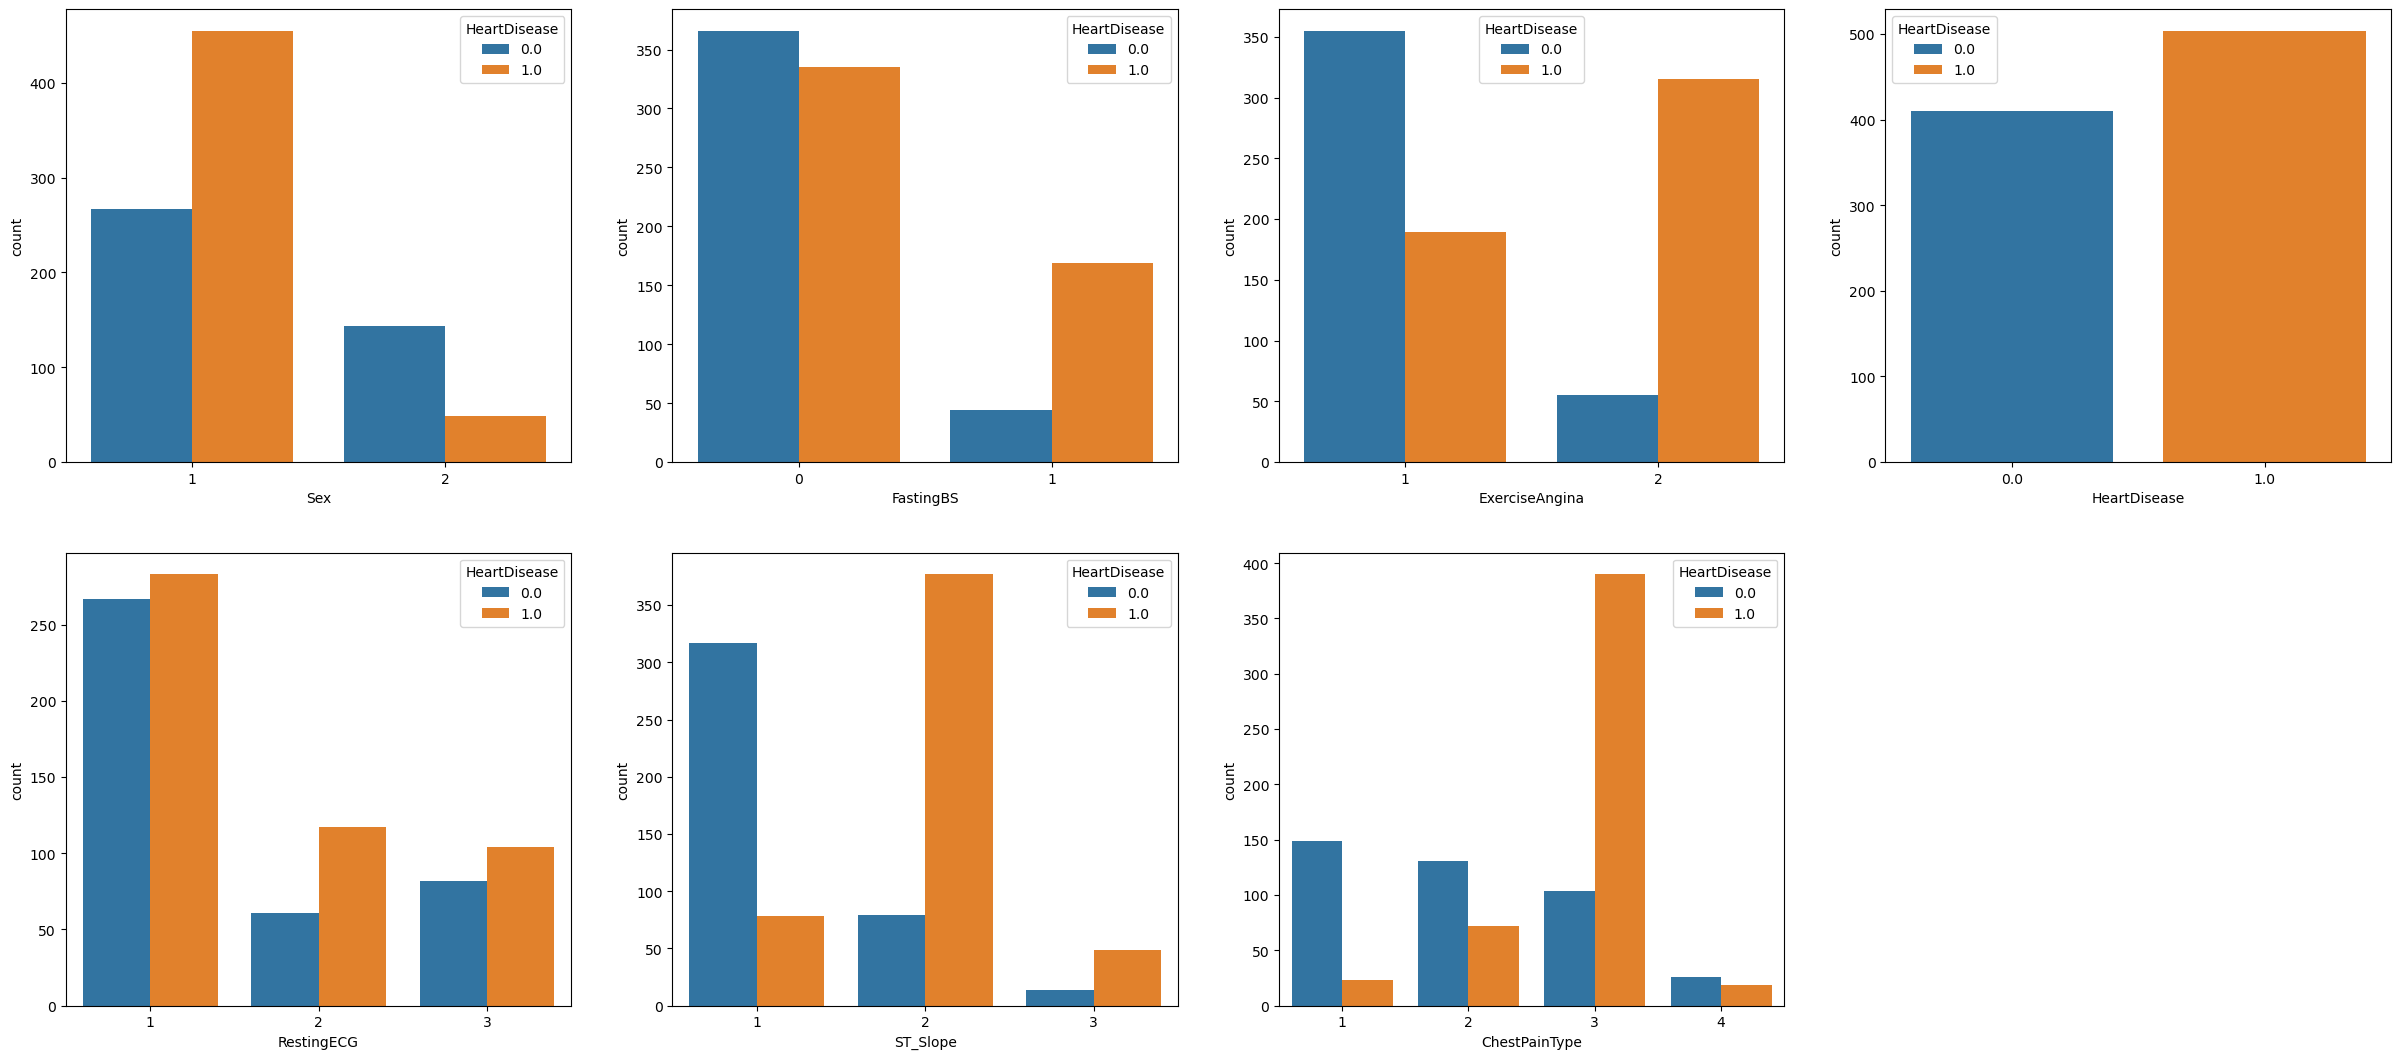

In [126]:

plt.figure(figsize=(30,20))
for i in enumerate(data_catagorical.columns):
    plt.subplot(3,4,i[0]+1)
    sns.countplot(x=i[1],hue="HeartDisease",data=data_catagorical)

In [127]:
data_continuous=data.select_dtypes(include=['float'])
data_continuous.info()

<class 'pandas.core.frame.DataFrame'>
Index: 914 entries, 0 to 923
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   RestingBP     914 non-null    float64
 1   Oldpeak       914 non-null    float64
 2   HeartDisease  914 non-null    float64
dtypes: float64(3)
memory usage: 28.6 KB


<Axes: >

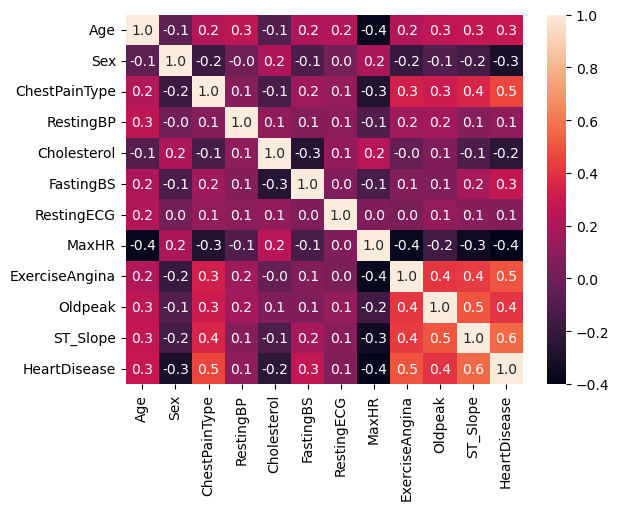

In [128]:
sns.heatmap(data.corr(), annot=True,fmt=".01f")

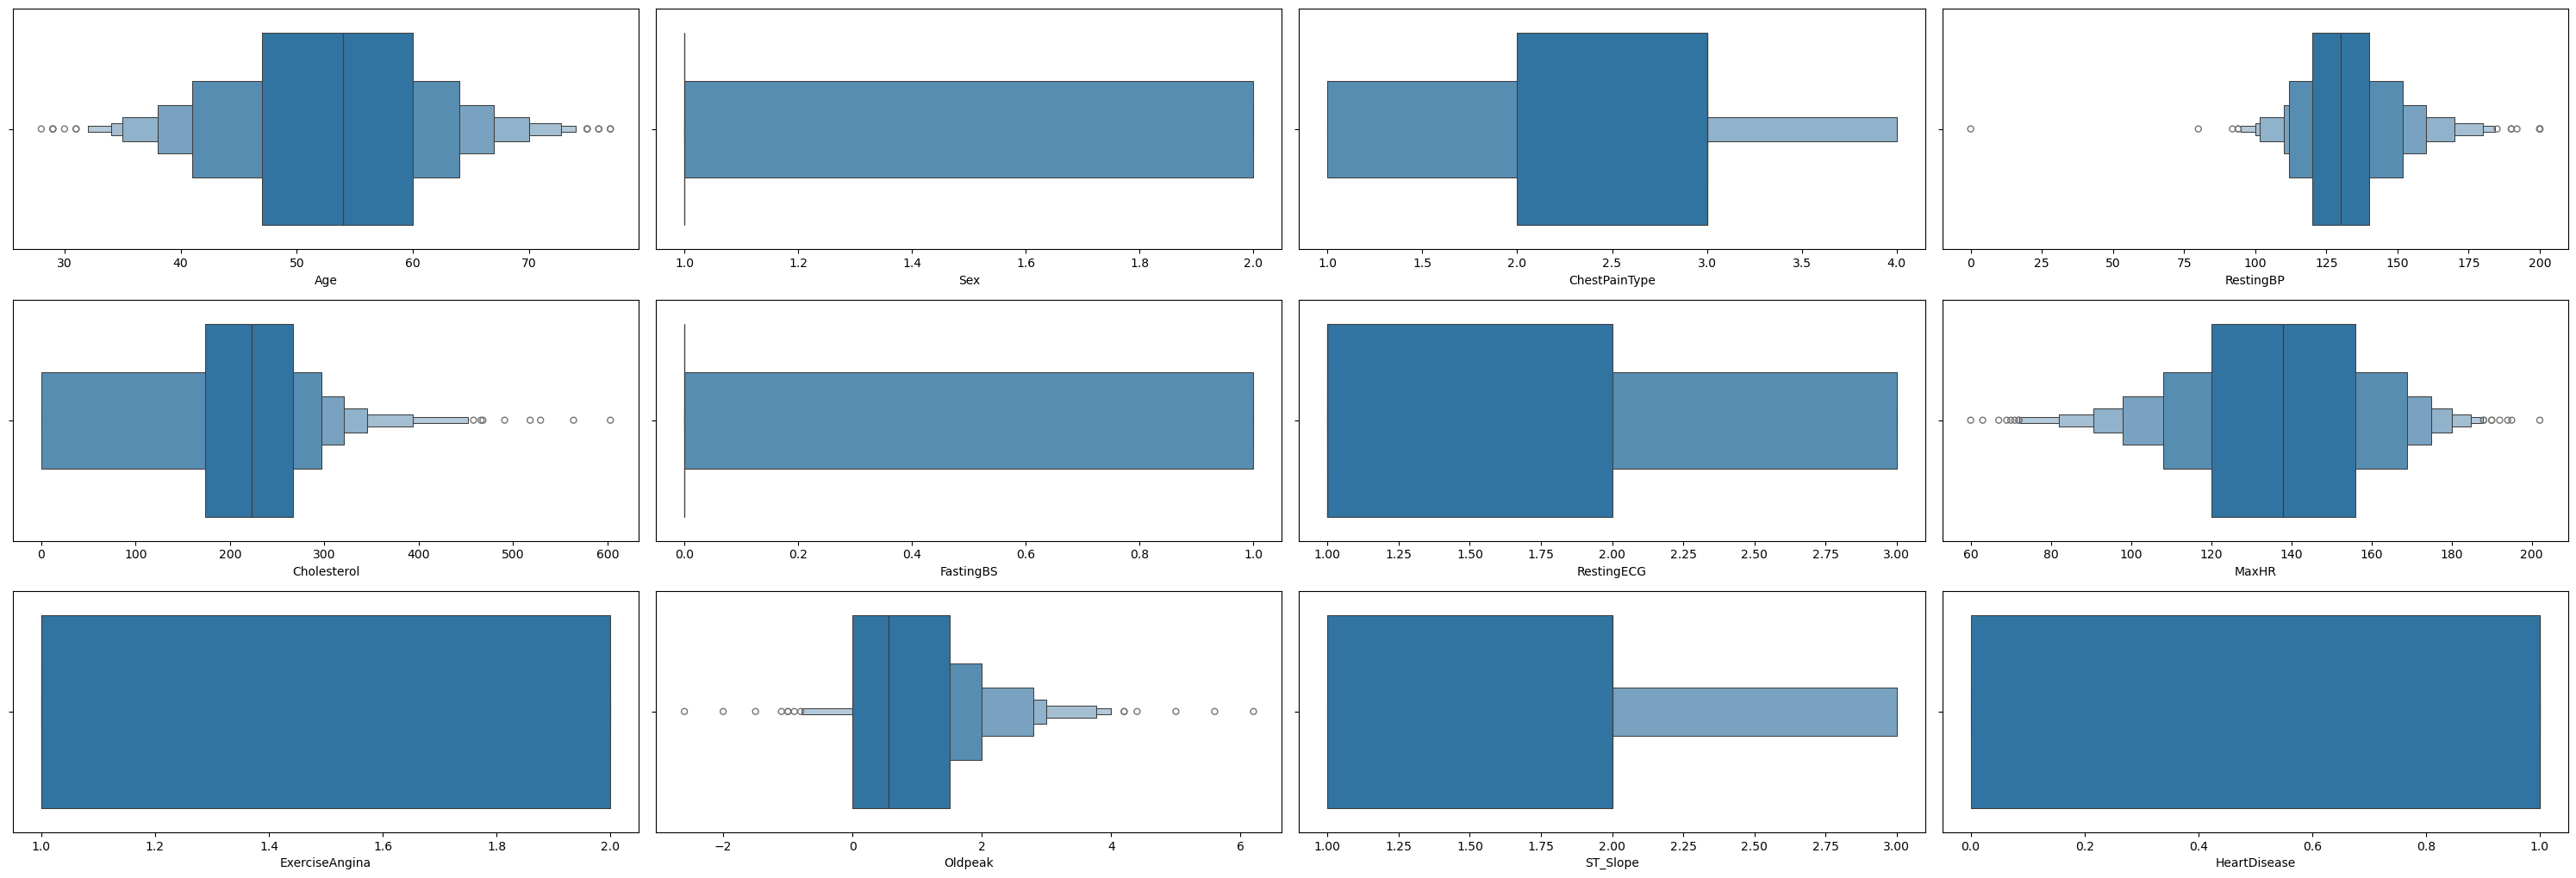

In [129]:
plt.figure(figsize=(30,20))
for i in enumerate(data.columns ):
    plt.subplot(6,4,i[0]+1)
    sns.boxenplot(x=i[1],data=data)
plt.tight_layout()

spliting data in to train and test 

In [130]:
X = data.drop(columns=['HeartDisease'])
X.shape

(914, 11)

In [131]:
y=data['HeartDisease']
y.shape

(914,)

In [132]:
data["HeartDisease"].value_counts()

HeartDisease
1.0    504
0.0    410
Name: count, dtype: int64

<Axes: xlabel='HeartDisease'>

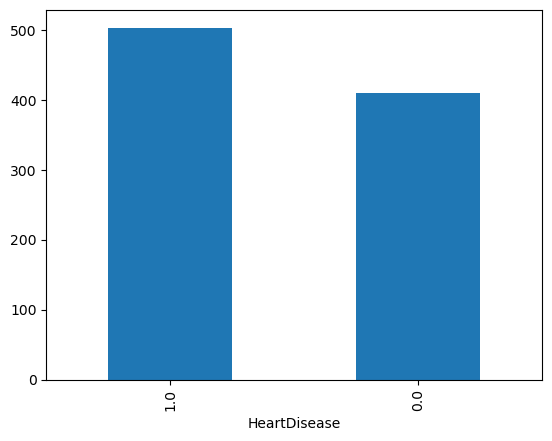

In [133]:
data["HeartDisease"].value_counts().plot(kind='bar')

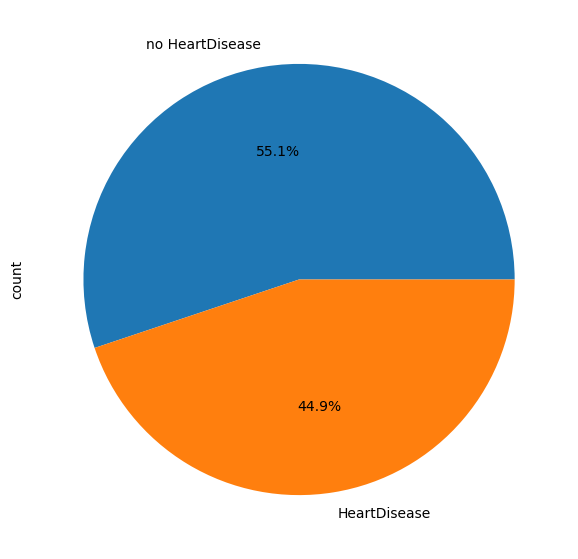

In [134]:
plt.figure(figsize=(10,7))
data['HeartDisease'].value_counts().plot(kind='pie',autopct='%1.1f%%',labels=['no HeartDisease',"HeartDisease"])
plt.show()

synthetic minority over sampling

In [135]:
over_sampling=SMOTE(random_state=0)
x_over_sampling, y_over_sampling = over_sampling.fit_resample(X,y)

In [136]:
x_over_sampling,y_over_sampling

(      Age  Sex  ChestPainType   RestingBP  Cholesterol  FastingBS  RestingECG  \
 0      40    1              1  140.000000          289          0           1   
 1      49    2              2  160.000000          180          0           1   
 2      37    1              1  130.000000          283          0           2   
 3      48    2              3  138.000000          214          0           1   
 4      54    1              2  150.000000          195          0           1   
 ...   ...  ...            ...         ...          ...        ...         ...   
 1003   61    1              2  106.238900          212          0           2   
 1004   53    1              2  134.407116          200          0           2   
 1005   53    1              2  152.098437          130          1           1   
 1006   56    1              2  129.627614          208          0           2   
 1007   40    1              1  130.111255          281          0           1   
 
       MaxHR  

In [137]:
y_over_sampling.value_counts()

HeartDisease
0.0    504
1.0    504
Name: count, dtype: int64

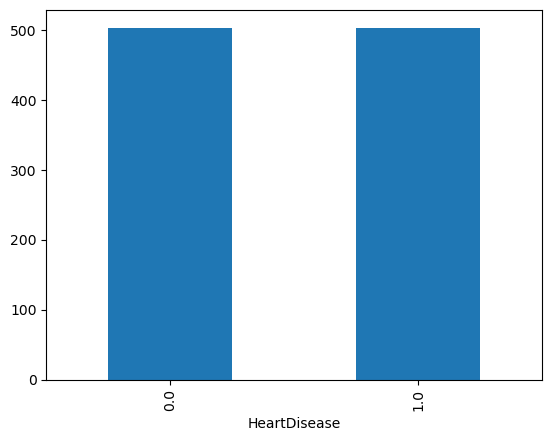

In [138]:
y_over_sampling.value_counts().plot(kind='bar')
plt.show()

In [139]:
x_train,x_test,y_train ,y_test=train_test_split(x_over_sampling,y_over_sampling,test_size=0.3,random_state=0)

In [140]:
sc_train=StandardScaler().fit(x_train)
x_train_sc=sc_train.transform(x_train)

In [141]:
np.set_printoptions(precision=3)
print(x_train_sc[0:5,:])

[[ 1.462 -0.522  1.866  0.528  0.626  1.884 -0.733 -0.514 -0.762  1.602
  -0.949]
 [ 1.25  -0.522  0.718  0.692 -1.888  1.884  0.528 -2.78  -0.762 -0.133
   0.686]
 [-0.557 -0.522  0.718 -0.016  0.644 -0.531  0.528  0.033 -0.762 -0.615
  -0.949]
 [-0.238  1.915 -0.43   0.964 -0.026 -0.531 -0.733 -0.71  -0.762 -0.326
  -0.949]
 [ 0.187 -0.522  0.718  1.4    0.132 -0.531 -0.733 -1.1    1.312  1.602
   0.686]]


training the model 

In [142]:
model=LogisticRegression(solver='liblinear')

In [143]:
model.fit(x_train_sc,y_train)

LogisticRegression(solver='liblinear')

testing the model 

In [144]:
sc_test=StandardScaler().fit(x_test)
x_test_sc=sc_test.transform(x_test)

In [145]:
results=model.score(x_test_sc,y_test)
results*100

86.46864686468648

In [146]:
results=model.score(x_train_sc,y_train)
results*100

87.65957446808511

In [147]:


y_pred = model.predict(x_test_sc)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[126  23]
 [ 18 136]]


In [148]:


print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.85      0.86       149
         1.0       0.86      0.88      0.87       154

    accuracy                           0.86       303
   macro avg       0.87      0.86      0.86       303
weighted avg       0.87      0.86      0.86       303



In [149]:


scores = cross_val_score(model, x_over_sampling, y_over_sampling, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", scores)
print("Mean Cross-Validation Accuracy:", scores.mean())


Cross-Validation Accuracy Scores: [0.807 0.837 0.807 0.831 0.806]
Mean Cross-Validation Accuracy: 0.8174621939805921


Hyperparameter Tuning

In [150]:



param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}


grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy', verbose=1)


grid_search.fit(x_train_sc, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


best_model = grid_search.best_estimator_
test_score = best_model.score(x_test_sc, y_test)
print("Test Accuracy with Best Parameters:", test_score)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'C': 1, 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.8680851063829789
Test Accuracy with Best Parameters: 0.8646864686468647


In [151]:
print("Final Test Accuracy:", best_model.score(x_test_sc, y_test))


Final Test Accuracy: 0.8646864686468647


In [152]:
y_pred = best_model.predict(x_test_sc)
cm = confusion_matrix(y_test, y_pred)
print("Final Confusion Matrix:\n", cm)


Final Confusion Matrix:
 [[126  23]
 [ 18 136]]


In [153]:
print("Final Classification Report:\n", classification_report(y_test, y_pred))



Final Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.85      0.86       149
         1.0       0.86      0.88      0.87       154

    accuracy                           0.86       303
   macro avg       0.87      0.86      0.86       303
weighted avg       0.87      0.86      0.86       303



In [154]:

best_model = grid_search.best_estimator_

model_filename = input("Enter the name for the model file (e.g., 'model.pkl'): ")


joblib.dump(best_model,f"{model_filename}.pkl" )
print(f"Model saved as {model_filename}")


Model saved as Heart_Disease_logistic_regression_model
